In [3]:
from ase.build import fcc111,fcc111_root
from ase.calculators.emt import EMT
import numpy as np
import matplotlib.pyplot as plt
from ase.db import connect
import ternary
import os
%matplotlib inline

from itertools import product
from ase.build import fcc111_root

# Pure metals lattice constant

First we get pure metals lattice constant.

## Lattice constant for Cu

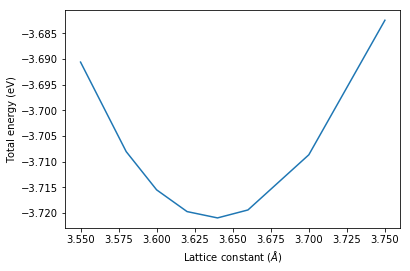

Lattice constant for Cu is 3.6388


In [4]:
from vasp import Vasp
from ase import Atom, Atoms
from ase.eos import EquationOfState
import numpy as np

LC = [3.55, 3.58, 3.6, 3.62, 3.64, 3.66, 3.7, 3.75]
fcc_energies = []
for a in LC:
    atoms = Atoms([Atom('Cu', (0, 0, 0))],
                  cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                                           [0.0, 1.0, 1.0],
                                           [1.0, 0.0, 1.0]]))

    calc = Vasp('bulk/Cu-{0}'.format(a),
                xc='PBE',
                encut=400,
                kpts=[10,10,10],
                atoms=atoms)

    e = atoms.get_potential_energy()
    fcc_energies.append(e)

plt.plot(LC, fcc_energies)
plt.xlabel('Lattice constant ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.show()


eos = EquationOfState(LC, fcc_energies)
Cu_lc, e0, B = eos.fit()
print(f'Lattice constant for Cu is {Cu_lc:1.4f}')

## Lattice constant for Ag

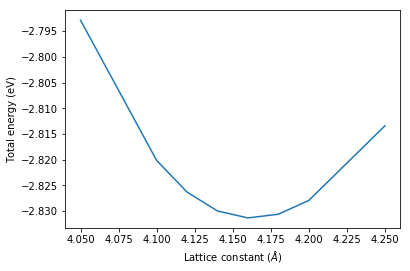

Lattice constant for Ag is 4.1628


In [5]:
LC_Ag = [4.05, 4.1, 4.12, 4.14, 4.16, 4.18, 4.2, 4.25]
fcc_energies_Ag = []
for a in LC_Ag:
    atoms = Atoms([Atom('Ag', (0, 0, 0))],
                  cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                                           [0.0, 1.0, 1.0],
                                           [1.0, 0.0, 1.0]]))

    calc = Vasp('bulk/Ag-{0}'.format(a),
                xc='PBE',
                encut=400,
                kpts=[10,10,10],
                atoms=atoms)

    e = atoms.get_potential_energy()
    fcc_energies_Ag.append(e)

plt.plot(LC_Ag, fcc_energies_Ag)
plt.xlabel('Lattice constant ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.show()


eos = EquationOfState(LC_Ag, fcc_energies_Ag)
Ag_lc, e0, B = eos.fit()
print(f'Lattice constant for Ag is {Ag_lc:1.4f}')

## Lattice constant for Au

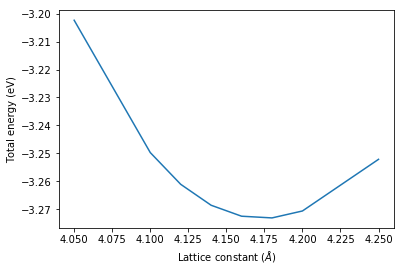

Lattice constant for Au is 4.1735


In [6]:
LC_Au = [4.05, 4.1, 4.12, 4.14, 4.16, 4.18, 4.2, 4.25]
fcc_energies_Au = []
for a in LC_Au:
    atoms = Atoms([Atom('Au', (0, 0, 0))],
                  cell=0.5 * a * np.array([[1.0, 1.0, 0.0],
                                           [0.0, 1.0, 1.0],
                                           [1.0, 0.0, 1.0]]))

    calc = Vasp('bulk/Au-{0}'.format(a),
                xc='PBE',
                encut=400,
                kpts=[10,10,10],
                atoms=atoms)

    e = atoms.get_potential_energy()
    fcc_energies_Au.append(e)

plt.plot(LC_Au, fcc_energies_Au)
plt.xlabel('Lattice constant ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.show()


eos = EquationOfState(LC_Au, fcc_energies_Au)
Au_lc, e0, B = eos.fit()
print(f'Lattice constant for Au is {Au_lc:1.4f}')

In [7]:
def gen_dir_comp(alpha, n_atoms, size):
    """
    Function to generate compositions according to Dirichlet distribution
    alpha: float: Dirichlet distribution parameter
    n_atoms: int: len(atoms)
    size: int: number of compositions to be return
    """
    all_comps = np.random.dirichlet((alpha, alpha, alpha), size=size) * n_atoms
    all_comps = np.rint(all_comps)  # rounding to close integer
    all_comps[:, 2] = n_atoms - np.sum(all_comps[:, :2], axis=1)  # constrain the sum equal to n_atoms
    all_comps = all_comps.astype(int)
    return all_comps

def plot_ternary(comps, scale, elements):
    """
    Function to plot compositions in ternary diagram
    elements: list of string: should be in the same order in comps
    comps: array: composition
    scale: int: scale of composition

    """
    # Rest of the code is to plot the obtained combinations on ternary diagram
    fig = plt.figure(figsize=(12, 8))
    fontsize=20
    ax = fig.add_subplot(111)
    ax.axis('off')
    figure, tax = ternary.figure(scale=100, ax=ax)
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=5)

    # Set Axis labels and Title
    tax.right_corner_label(elements[0], fontsize=fontsize)
    tax.top_corner_label(elements[1], fontsize=fontsize)
    tax.left_corner_label(elements[2], fontsize=fontsize)
    
    tax.scatter(comps)

    tax.ticks(axis='lbr', multiple=5, linewidth=2, fontsize=fontsize, offset=0.02)
    tax.clear_matplotlib_ticks()
    tax.show()


def plot_atomic_fp(to_plot_fps, elements):
    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(to_plot_fps[:, 0], to_plot_fps[:, 1], to_plot_fps[:, 2], s=0.5)
    ax.view_init(45, 45)
    ax.set_xlabel(f'fp-{elements[0]}')
    ax.set_ylabel(f'fp-{elements[1]}')
    ax.set_zlabel(f'fp-{elements[2]}')

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(to_plot_fps[:, 0], to_plot_fps[:, 1], to_plot_fps[:, 2], s=0.5)
    ax.view_init(0, -45)
    ax.set_xlabel(f'fp-{elements[0]}')
    ax.set_ylabel(f'fp-{elements[1]}')
    ax.set_zlabel(f'fp-{elements[2]}')

    # ax.set_xticks([0, 2, 4, 6, 8, 10, 12])
    # ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
    fig.tight_layout()
    plt.show()

In [ ]:
# elements = ['Cu', 'Ag', 'Au']  # [1, 2, 3 in the param_set]


# #Connecting to database
# db = connect('test.db')

# size_and_number = [((1,1,7),100),     #1 by 1 by 7 
#                    ((2,1,7),100),     #2 by 1 by 7
#                    ((3,3,7),200),     #r3 by r3 by 7
#                    ((7,7,5),200),     #r7 by r7 by 5
#                    ((3,3,5),200)]     #3 by 3 by 5

# all_LC = [Cu_lc,Ag_lc,Au_lc]

# LC = np.linspace(min(all_LC),max(all_LC),5)

# nrg_list = []    # This list is intended to contain all the energies of the atoms
# images = []      # This list is intended to contain the atoms objects for each composition
# comps = []       # This list is intended to contain composition of each different sizes


# total_count = 0   # This can be used to track all the Vasp calculators with a id.
# calc_id = 0


# # This single loop to loop over all the sizes
# for ((cell_size,number),lc) in product(size_and_number,LC): 
    
#     """
#     Cell_size: will be tuple of the cell size dimension
#     number: denotes how many sample per each LC
#     lc: contains the lattice constant
#     """
    
#     # Reset count to Zero
#     count = 0
    
#     #N_per_lc comes from the iterating 
#     N_per_lc = number
    
#     while count < N_per_lc:
        
#         # Different initialization for the root and conventional unit cell
#         if cell_size in [(1,1,7),(2,1,7),(3,3,5)]:
#             atoms = fcc111('Au', size=cell_size, a=lc, vacuum=10)
#         else:
#             atoms = fcc111_root('Au',size=(1,1,7),root=cell_size[0],a=lc,vacuum=10)
        
#         # Using alpha same for all the configurations
#         n_0, n_1, n_2 = gen_dir_comp(alpha=1.3, n_atoms=len(atoms), size=1)[0]
#         symbols = [elements[0]] * n_0 + [elements[1]] * n_1 + [elements[2]] * n_2
#         np.random.shuffle(symbols)

#         atoms.set_chemical_symbols(symbols)
#         atoms.set_calculator(EMT())
#         nrg = atoms.get_potential_energy()
        
#         if nrg not in nrg_list:
#             nrg_list.append(nrg)
#             images.append(atoms)
#             comps.append((n_0, n_1, n_2))
#             count = count + 1 
            
#             calc_id = db.write(atoms,relaxed = False)

In [2]:
from vasp import Vasp
from ase.db import connect

db = connect('test.db')
# Contains all the configurations generated above

small_db = connect('small_test.db')
# New database that will contain the newly generated energies

images = list(db.select())
small_images = images[:50]
# Testing small subset of the data

calc_id = 0

for count,image in enumerate(small_images):
    # len(atom.Rows) is not defined 
    # To get number of atoms in the Atoms object, we can use atom.number
    # which will give us length of atomic numbers
    # https://wiki.fysik.dtu.dk/ase/ase/db/db.html#description-of-a-row
    
    number_of_atoms = len(image.numbers)
    imagename = str(count)
    if number_of_atoms == 7:  # 1 1 7
        kpts = [10, 10, 1]
    elif number_of_atoms == 14:  # 2 1 7
        kpts = [5, 10, 1]
    elif number_of_atoms == 21:  # r3r37
        kpts = [6, 6, 1]
    elif number_of_atoms == 35:  # r7r75
        kpts = [4, 4, 1]
    elif number_of_atoms == 45:  # 3 3 5
        kpts = [3, 3, 1]
        
    
    filename = 'sampling/CuAgAutest' + imagename
    new_atoms = db.get_atoms(selection=count+1)
    calc = Vasp(filename, xc='PBE', encut=400, kpts=kpts, atoms=new_atoms)
    calc_id = small_db.write(new_atoms,relaxed = False)

In [ ]:
#     calc_id = small_db.write(new_atoms,relaxed = False)
#     calc.stop_if(new_atoms.get_potential_energy() is None)

In [4]:
small_images = images[10:50]
for count,image in enumerate(small_images):
    # len(atom.Rows) is not defined 
    # To get number of atoms in the Atoms object, we can use atom.number
    # which will give us length of atomic numbers
    # https://wiki.fysik.dtu.dk/ase/ase/db/db.html#description-of-a-row
    
    number_of_atoms = len(image.numbers)
    imagename = str(count)
    print (count)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:

for ((cell_size,number),lc) in product(size_and_number,LC): 
 